In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from fastai.core import ItemBase
# from fastai.data_block import ItemList, PreProcessor
# from fastai.vision.data import ImageList
# from fastai.vision.image import Image,open_image
# from pathlib import Path

# import pandas as pd 
# import math

In [3]:
from fastai import *
from fastai.vision import *
from dsin.ae.data_manager.data_loader import (
    SideinformationImageImageList, ImageSiTuple)


In [4]:
image_list = SideinformationImageImageList.from_csv(path="/mnt/code/repos/tDSIN/src/dsin/data",csv_names=["tiny_KITTI_stereo_train.txt","tiny_KITTI_stereo_val.txt"])

In [5]:
image_list[0].si_img.shape


torch.Size([3, 370, 1226])

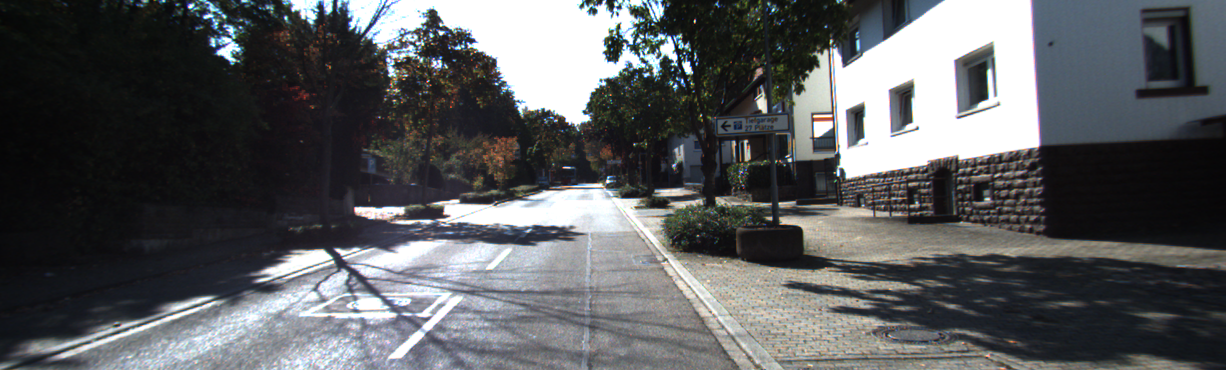

In [6]:
image_list[0].img


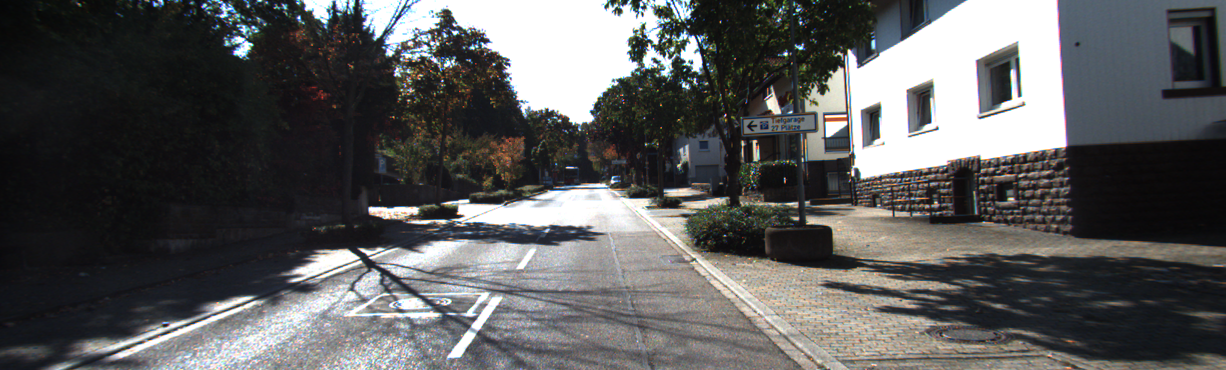

In [7]:
image_list[0].si_img

In [23]:
# size = 32
batchsize = 1
# tfms = get_transforms(do_flip = True)
# src = (ImageImageList.from_folder(image_path).label_from_func(lambda x: x))
# data = (src.transform(tfms, size=size, tfm_y=True)
data = (image_list
        .split_by_valid_func(lambda x: 'testing'  in x )
        .label_from_func(lambda x: x)
        .databunch(bs=batchsize))
 

In [21]:
len(data.train_ds)

50

In [22]:
len(data.valid_ds)

30

In [26]:
from dsin.ae.si_ae import *
from dsin.ae import config

In [28]:
si_ae = SideInformationAutoEncoder(SiNetChannelIn.NoSideInformation)


In [ ]:

my_learner = Learner(data = data,
                     si_ae,
                     opt_func=torch.optim.Adam,
                     crit=criterion)

#  Testing


Use a normal validation set, and then when the training is over, you just want to validate the test set w/ labels as a validation set, you can do this:


In [25]:
def create_test_set_example(dont_run):
    tfms = []
    path = Path('data').resolve()
    data = (ImageList.from_folder(path)
            .split_by_pct()
            .label_from_folder()
            .transform(tfms)
            .databunch()
            .normalize() ) 
    learn = cnn_learner(data, models.resnet50, metrics=accuracy)
    learn.fit_one_cycle(5,1e-2)

    # now replace the validation dataset entry with the test dataset as a new validation dataset: 
    # everything is exactly the same, except replacing `split_by_pct` w/ `split_by_folder` 
    # (or perhaps you were already using the latter, so simply switch to valid='test')
    data_test = (ImageList.from_folder(path)
            .split_by_folder(train='train', valid='test')
            .label_from_folder()
            .transform(tfms)
            .databunch()
            .normalize()
           ) 
    learn.validate(data_test.valid_dl)
